<a href="https://colab.research.google.com/github/Mikepa22/Projects-IA/blob/main/SVM_vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/winequality-white.csv')
data.head()

Mounted at /content/drive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


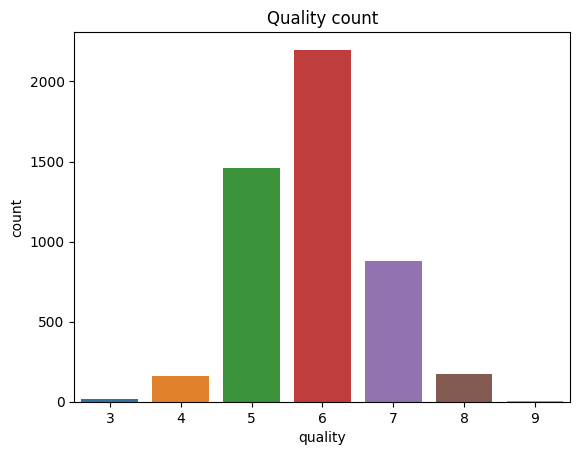

In [ ]:
plt.title('Quality count')
sns.countplot(x = data['quality'])
plt.show()

In [ ]:
X = data.drop(['quality'], axis=1)
Y = data['quality'].values
print(X.shape)
print(Y.shape)

(4898, 11)
(4898,)


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with the desired ratio for each class
desired_ratios = {3: 2198, 4: 2198, 5: 2198, 7:2198 ,8: 2198, 9: 2198}  # Adjust ratios as needed
smote = SMOTE(sampling_strategy=desired_ratios, k_neighbors=4, random_state=42)

# Fit and apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Check the distribution of the classes after SMOTE
unique, counts = np.unique(y_resampled, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class distribution after SMOTE:", class_counts)

Class distribution after SMOTE: {3: 2198, 4: 2198, 5: 2198, 6: 2198, 7: 2198, 8: 2198, 9: 2198}


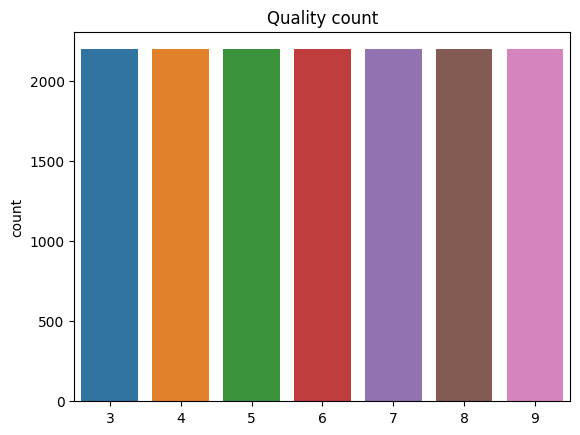

In [ ]:
plt.title('Quality count')
sns.countplot(x = y_resampled)
plt.show()

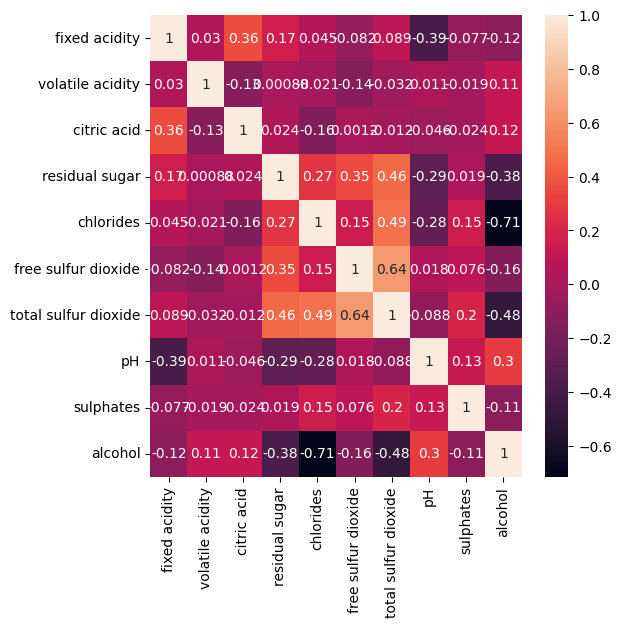

In [ ]:
plt.figure(1, figsize = (6,6))
correlacion = X_resampled.corr(method = "spearman")
sns.heatmap(correlacion,annot=True)
plt.show()

In [ ]:
threshold = 0.8
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))
print(to_drop)
X = X.drop(to_drop, axis=1)
print(X.shape)

There are 0 columns to remove.
[]
(4898, 10)


In [ ]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1.fit(X_resampled)
X_n=scaler1.transform(X_resampled)
X_n = np.array(X_n)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=12)
print("Training Data:", X_train.shape,y_train.shape)
print("Testing Data:", X_test.shape,y_test.shape)

Training Data: (12308, 10) (12308,)
Testing Data: (3078, 10) (3078,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=2.0, gamma=0.5, random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.857050032488629


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.97      0.87      0.92       430
           4       0.98      0.86      0.92       456
           5       0.85      0.69      0.76       433
           6       0.53      0.84      0.65       423
           7       0.93      0.82      0.87       447
           8       0.98      0.92      0.95       467
           9       0.98      1.00      0.99       422

    accuracy                           0.86      3078
   macro avg       0.89      0.86      0.86      3078
weighted avg       0.89      0.86      0.87      3078



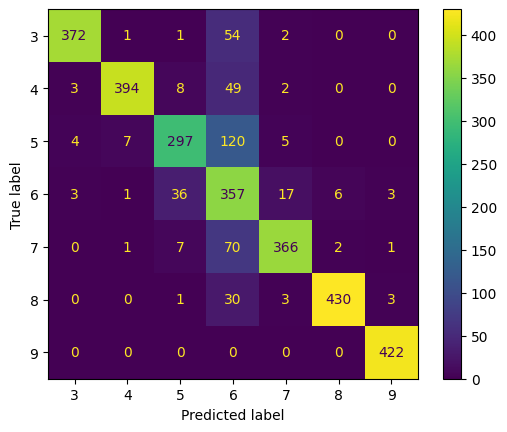

In [ ]:
from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)